In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import md

# 3.1 Harmonic Oscillator

1. Wave number is a measure of cycles per unit distance. I.e. number of waves per unit distance. Wave number $\nu$ is defined as,
\begin{equation}
    \nu = \frac{1}{\lambda},
\end{equation}
with $\lambda$ meaning wavelength, usually in cm. With this equation we can find the conversion to frequency, $f$, angular frequency, $w$, and vibration period $T$.
\begin{align}
    f &= c \nu \\
    w &= \frac{c \nu}{2 \pi} \\
    T &= \frac{1}{c \nu}
\end{align}

In [4]:
def wavenumber_to_f_w_T(wavenumber):
    """Give wavenumber in units of (cm)^{-1.}"""
    c = 29979245800 # cm/s
    f = c * wavenumber
    w = f / (2 * np.pi)
    T = 1/f
    return f, w, T

In [5]:
wavenumbers = {
    'c-h': 3000,
    'c-d': 2100,
    'c-c': 1000,
    'c=c': 1700,
    'c#c': 2200
}

In [6]:
angular_freqs = {}
freqs = {}
periods = {}

for key, wavenumber in wavenumbers.items():
    f, w, T = wavenumber_to_f_w_T(wavenumber)
    freqs[key] = f
    angular_freqs[key] = w
    periods[key] = T
    print(f"{key}: \t f = {f:0.2E} s^{-1}, \n"
          f"\t w = {w:0.2E} s^{-1}, \n"
          f"\t T = {T:0.2E} s")

c-h: 	 f = 8.99E+13 s^-1, 
	 w = 1.43E+13 s^-1, 
	 T = 1.11E-14 s
c-d: 	 f = 6.30E+13 s^-1, 
	 w = 1.00E+13 s^-1, 
	 T = 1.59E-14 s
c-c: 	 f = 3.00E+13 s^-1, 
	 w = 4.77E+12 s^-1, 
	 T = 3.34E-14 s
c=c: 	 f = 5.10E+13 s^-1, 
	 w = 8.11E+12 s^-1, 
	 T = 1.96E-14 s
c#c: 	 f = 6.60E+13 s^-1, 
	 w = 1.05E+13 s^-1, 
	 T = 1.52E-14 s


2. Reduced mass is defined as, 
\begin{equation}
    \mu = \frac{m_{1}m_{2}}{m_1 + m_2}.
\end{equation}
The motion of two bonded particles can be redefined as an oscilation of a single particle with a reduced mass. That single particle oscilates around a characteristic bond length. In our system, this implies that the differential equation defining the behavior is,
\begin{equation}
    \mu \ddot{r} = -kr.
\end{equation}
This implies that the angular frequency, $w$, is related to $k$ by,
\begin{equation}
    w = \sqrt{\frac{k}{\mu}}.
\end{equation}

In [7]:
def reduce_mass(x, y):
    return x*y/(x+y)

def spring_constant(w, mu):
    return mu * (w)**2

In [8]:
kg_per_u = 1.661E-27

atm_ms = {
    'c': 12.0107 * kg_per_u,
    'd': 2.0136 * kg_per_u,
    'h': 1.0078 * kg_per_u
}

reduced_masses = {
    'c-h': reduce_mass(atm_ms['c'], atm_ms['h']),
    'c-d': reduce_mass(atm_ms['c'], atm_ms['d']),
    'c-c': reduce_mass(atm_ms['c'], atm_ms['c']),
    'c=c': reduce_mass(atm_ms['c'], atm_ms['c']),
    'c#c': reduce_mass(atm_ms['c'], atm_ms['c'])
}

In [9]:
spring_constants = {}
for key, redu_m in reduced_masses.items():
    k = spring_constant(angular_freqs[key], redu_m)
    spring_constants[key] = k
    print(f"{key}: k = {k:0.3f}")

c-h: k = 0.316
c-d: k = 0.288
c-c: k = 0.227
c=c: k = 0.656
c#c: k = 1.099


In [10]:
df = pd.DataFrame([wavenumbers, freqs, angular_freqs, periods, reduced_masses, spring_constants], 
                  index=['wavenumber', 'frequency', 'angular frequency', 'period', 'reduced mass','spring constant']).T

In [11]:
df.T

,c#c,c-c,c-d,c-h,c=c
wavenumber,2.200000e+03,1.000000e+03,2.100000e+03,3.000000e+03,1.700000e+03
frequency,6.595434e+13,2.997925e+13,6.295642e+13,8.993774e+13,5.096472e+13
angular frequency,1.049696e+13,4.771345e+12,1.001982e+13,1.431404e+13,8.111287e+12
period,1.516200e-14,3.335641e-14,1.588400e-14,1.111880e-14,1.962142e-14
reduced mass,9.974886e-27,9.974886e-27,2.864376e-27,1.544370e-27,9.974886e-27
spring constant,1.099094e+00,2.270856e-01,2.875744e-01,3.164285e-01,6.562774e-01


3. We can compare the effects of reduced mass, $\mu$, by comparing all the single bonded examples, i.e. c-c, c-h, and c-d. In the figure below, increasing reduced mass, $\mu$, leads to a decreased vibrational frequency. Notice that the relationship seems to be nonlinear.

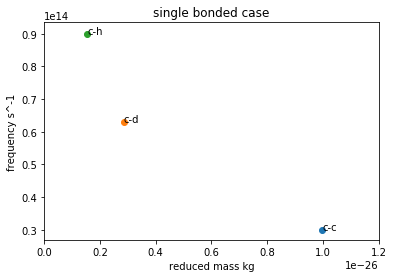

In [12]:
fig, ax = plt.subplots()

for key in ['c-c', 'c-d', 'c-h']:
    x = df.loc[key]['reduced mass']
    y = df.loc[key]['frequency']
    ax.scatter(x, y)
    ax.annotate(key, xy=(x, y), xytext=(x, y))
    
ax.set_title('single bonded case')
ax.set_xlim(0e-27, 12e-27)
ax.set_xlabel('reduced mass kg')
ax.set_ylabel('frequency s^-1');

plt.show()

3. (cont.) We can compare the effects of bond strength by considering the carbon to carbon bonds. These bonds all have the same reduced mass, but a different bond strength. In the figure below, increasing spring constant (which is a stand in for bond strength) linearly increases the frequency.

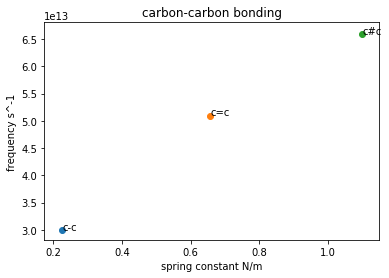

In [13]:
fig, ax = plt.subplots()

for key in ['c-c', 'c=c', 'c#c']:
    x = df.loc[key]['spring constant']
    y = df.loc[key]['frequency']
    ax.scatter(x, y)
    ax.annotate(key, xy=(x, y), xytext=(x, y))
    
ax.set_title('carbon-carbon bonding')
ax.set_xlabel('spring constant N/m')
ax.set_ylabel('frequency s^-1');

plt.show()

# 3.2 Integration of the equation of motion

The harmonic potential is, 

\begin{equation}
    U(q) = \frac{k}{2}(q-q_{0})^2.
\end{equation}

The reduced mass is $\mu = 6.00 \text{u}$, the force constant is $k = 6.15 \times 10^{4} \text{kJ mol}^{-1}\text{nm}^{2}$, the equilibrium bond distance is $q_{0} = 0.134 \text{nm}$.

1. First we move to a coordinate system better suited to distance from equilibrium. In particular, $\tilde{q} = q - q_{0}$ with $\frac{d\tilde{q}}{dq} = 1$. Therefore we have $U(\tilde{q}) = \frac{k}{2}\tilde{q}^{2}$. Since $F = -\frac{d}{d\tilde{q}}U(\tilde{q})$, we derive the equation of motion,
\begin{align}
    \ddot{\tilde{q}} &= -\frac{k}{\mu}(\tilde{q}).
\end{align}
We impose arbitrary initial conditions, $\tilde{q}(t=0) = \tilde{q}_{i}$ and $\dot{\tilde{q}}(t=0) = v_{i}$ and propose the following solution,
\begin{equation}
    \tilde{q}(t) = a \cos \sqrt{\frac{k}{\mu}} t + b \sin \sqrt{\frac{k}{\mu}} t.
\end{equation}
Now, let's solve for our initial conditions,
\begin{align}
    \tilde{q}_{i} &= a \\
    v_{i} &= b \sqrt{\frac{k}{\mu}}.
\end{align}
That reveals a final solution of,
\begin{equation}
    \tilde{q}(t) = \tilde{q}_{i} \cos \sqrt{\frac{k}{\mu}} t + \frac{v_{i}}{\sqrt{\frac{k}{\mu}}} \sin \sqrt{\frac{k}{\mu}} t.
\end{equation}
Lastly, we show that it actually solves the differential equation,
\begin{align}
    \frac{d^{2}}{d\tilde{q}^{2}} \left(
    \tilde{q}_{i} \cos \sqrt{\frac{k}{\mu}} t + \frac{v_{i}}{\sqrt{\frac{k}{\mu}}} \sin \sqrt{\frac{k}{\mu}} t \right)
    &= -\frac{k}{\mu} \left(
    \tilde{q}_{i} \cos \sqrt{\frac{k}{\mu}} t + \frac{v_{i}}{\sqrt{\frac{k}{\mu}}} \sin \sqrt{\frac{k}{\mu}} t \right) \\
    \frac{d}{d\tilde{q}} \sqrt{\frac{k}{\mu}} \left(
    -\tilde{q}_{i} \sin \sqrt{\frac{k}{\mu}} t + \frac{v_{i}}{\sqrt{\frac{k}{\mu}}} \cos \sqrt{\frac{k}{\mu}} t \right)
    &= -\frac{k}{\mu} \left(
    \tilde{q}_{i} \cos \sqrt{\frac{k}{\mu}} t + \frac{v_{i}}{\sqrt{\frac{k}{\mu}}} \sin \sqrt{\frac{k}{\mu}} t \right) \\
    -\frac{k}{\mu} \left(
    \tilde{q}_{i} \cos \sqrt{\frac{k}{\mu}} t + \frac{v_{i}}{\sqrt{\frac{k}{\mu}}} \sin \sqrt{\frac{k}{\mu}} t \right)
    &= -\frac{k}{\mu} \left(
    \tilde{q}_{i} \cos \sqrt{\frac{k}{\mu}} t + \frac{v_{i}}{\sqrt{\frac{k}{\mu}}} \sin \sqrt{\frac{k}{\mu}} t \right), \\
\end{align}
which proves the solution.

2. Let bond distance at $t=0$ be $q(0) = 0.187 \text{nm}$, which implies $\tilde{q}(0) = q(0) - q_{0} = 0.187 - 0.134 = .053$, and velocity $v(0) = 0 \text{nm ps}^{-1}$

In [14]:
def q(t, q0, v0):
    """q0 is given in absolute position."""
    equili_bond_dist = 0.134
    q0 = q0 - equili_bond_dist
    k = 6.15E5
    u = 6.00
    w = np.sqrt(k/u)
    return q0 * np.cos(w*t) + (v0/w) * np.sin(w * t) + equili_bond_dist

def v(t, q0, v0):
    """q0 is given in absolute position."""
    equili_bond_dist = 0.134
    q0 = q0 - equili_bond_dist
    k = 6.15E5
    u = 6.00
    w = np.sqrt(k/u)
    return -q0 * w * np.sin(w*t) + v0 * np.cos(w * t)

In [15]:
q0 = 0.187
v0 = 0
qq = lambda x: q(x, q0, v0)
vv = lambda x: v(x, q0, v0)

In [16]:
t = np.linspace(0, 0.1, 1000)
pos = qq(t)
vel = vv(t)

In [17]:
def pos_velo_plot(t, pos, vel, 
                  title='Position and Velocity of Vibration'):
    fig, ax = plt.subplots(2, sharex=True)
    ax[0].plot(t, pos)
    ax[0].set_title(title)
    ax[0].set_ylabel('Position [nm]')

    ax[1].plot(t, vel)
    ax[1].set_ylabel('Velocity [nm ps^-1]')
    ax[1].set_xlabel('Time [ps]')
    return fig, ax

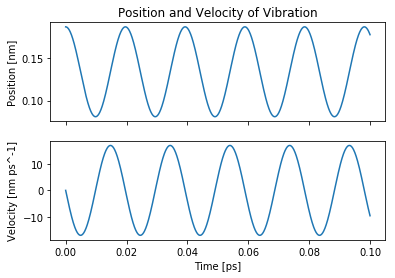

In [18]:
pos_velo_plot(t, pos, vel)
plt.show()

3. When reading about timescales of molecular vibration, I found that the calculations above are too fast for most molecules. Usually the molecular vibration is on the order of $10^{-10} \text{s}$ which translates to $100 \text{ps}$. However, my oscillations seem to be on the order of $0.01 \text{ps}$.

However, to answer the question... The point is we must choose a timestep which will resolve the oscillations. Given the reported values above, a time step would need to be on the order of $0.02/4 = 0.005 \text{ps} = 5\text{fs}$ or smaller.

4a. Euler

In [19]:
def euler_harmonic_osc(t0, q0, v0, step_size, num_steps,
                      k=6.15E5, m=6.00, q_equi=0.134):
    dvdt = lambda x: -k/m * (x - q_equi)
    dqdt = lambda v: v
    
    ts, qs, vs = [t0], [q0], [v0]
    for i in range(num_steps):
        t, q, v = ts[-1], qs[-1], vs[-1]
        
        v = v + step_size * dvdt(q)
        q = q + step_size * dqdt(v)
        t = t + step_size
        
        ts.append(t)
        qs.append(q)
        vs.append(v)
    return np.asarray([ts, qs, vs])

In [20]:
out = euler_harmonic_osc(0, 0.187, 0, .001, 100)

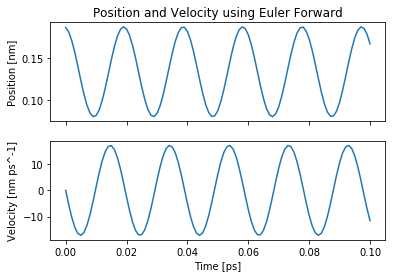

In [21]:
pos_velo_plot(out[0], # time
              out[1], # position
              out[2], # velocity
              title='Position and Velocity using Euler Forward'); 

plt.show()

4b. Verlet

In [22]:
def verlet_harmonic_osc(t0, q0, v0, step_size, num_steps,
                        k=6.15E5, m=6.00, q_equi=0.134):
    dvdt = lambda x: -k/m * (x - q_equi)
    dqdt = lambda v: v
    
    ts, qs, vs = [t0], [q0], [v0]
    q = q0 + v0 * step_size + (dvdt(q0) / 2) * step_size ** 2 
    qs.append(q)
    
    for i in range(num_steps):
        force = dvdt(qs[-1])
        q_new = 2*qs[-1] - qs[-2] + (force / 2) * step_size ** 2 
        v_new = (q_new - qs[-2]) / (2 * step_size)
        
        qs.append(q_new)
        vs.append(v_new)
        ts.append(ts[-1] + step_size)
    return np.asarray([ts, qs[:-1], vs])

In [23]:
out = verlet_harmonic_osc(0, 0.187, 0, .001, 100)

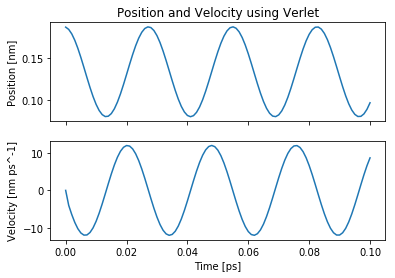

In [24]:
pos_velo_plot(out[0], # time
              out[1], # position
              out[2], # velocity
              title='Position and Velocity using Verlet'); 

plt.show()

5. Verlet integration is a symplectic integration scheme. Euler Forward is not. For this reason, Euler forward should always be adding an error to the solution for every time step. Velocity verlet should remain within a certain error bound. This will be illustrated below with an explosion of growth for the Euler Forward. Verlet will not exhibit this behavior.

In [25]:
tau = 0.0063
num_steps = 100

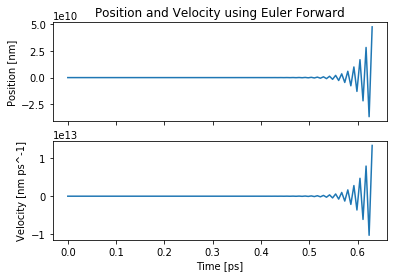

In [26]:
out = euler_harmonic_osc(0, 0.187, 0, tau, num_steps)
pos_velo_plot(out[0], # time
              out[1], # position
              out[2], # velocity
              title='Position and Velocity using Euler Forward'); 

plt.show()

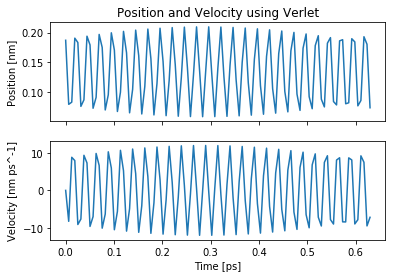

In [27]:
out = verlet_harmonic_osc(0, 0.187, 0, tau, num_steps)
pos_velo_plot(out[0], # time
              out[1], # position
              out[2], # velocity
              title='Position and Velocity using Verlet'); 

plt.show()

6. The analytical solution can be evaluated at any time using constant calculation time. The numerical one requires the calculating of $t_{n-1}$ steps before getting the solution at $t_{n}$.

The analytical solution is smooth, while the numerical solutions are a sequence of linear steps. 

The numerical solution depends on choice of intergration algorithm, duration of integration, and choice of timestep. The analytical soltion does not require thinking about any of these hyperparameters.